# 1 Generating Random Networks

In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



## 1. Create random networks using Erdös-Rényi (ER) model

(a) Create an undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbi- trary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. `What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values`.

[1] "When prob is 0.003000:The mean is 2.928000 and the variance is 2.769586"
[1] "When prob is 0.004000:The mean is 4.130000 and the variance is 4.155255"
[1] "When prob is 0.010000:The mean is 9.640000 and the variance is 9.259660"
[1] "When prob is 0.050000:The mean is 50.260000 and the variance is 44.761161"
[1] "When prob is 1.000000:The mean is 999.000000 and the variance is 0.000000"


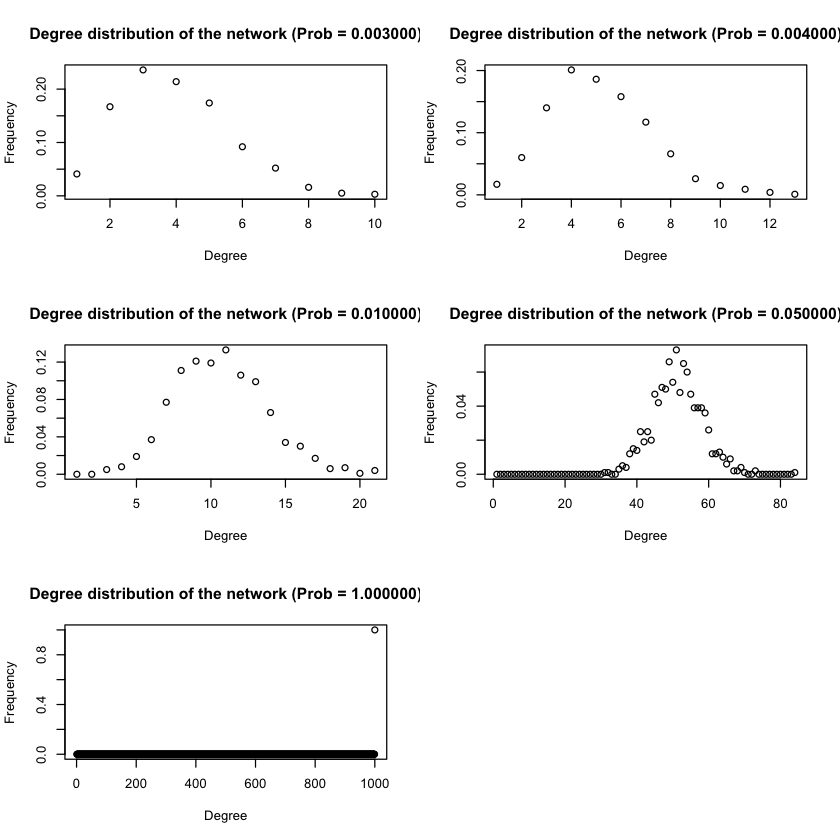

In [2]:
prob <- c(0.003, 0.004, 0.01, 0.05, 1)
n <- 1000
par(mfrow=c(3,2))
for (i in seq(1:5)) {
    # plot
    g <- random.graph.game(n, prob[i], directed = FALSE)
    title = sprintf("Degree distribution of the network (Prob = %f)", prob[i])
    plot(degree.distribution(g), main = title, xlab = "Degree", ylab = "Frequency")
    
    # mean and variance
    deg <- degree(g)
    avgDegree <- mean(deg)
    variance <- var(deg)
    res <- sprintf("When prob is %f:The mean is %f and the variance is %f", prob[i], avgDegree, variance)
    print(res)
}

(b) For each p and n = 1000, answer the following questions: Are all random realizations of the ER network connected? `Numerically estimate the probability that a generated network is connected.` For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

In [3]:
prob <- c(0.003, 0.004, 0.01, 0.05, 1)
n <- 1000
for (i in seq(1:5)) {
    g <- erdos.renyi.game(n, prob[i], directed = FALSE)
    # isconnected
    if (is.connected(g)) {
        res <- sprintf("prob = %f, n = %d, graph is connected.\n", prob[i], n)
    } else {
        res <- sprintf("prob = %f, n = %d, graph is not connected.\n", prob[i], n)
        
        # Giant Connected Component
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == giant.idx))
        
        # diameter of GCC
        d <- diameter(g.giant)
        resD <- sprintf("The diameter of the GCC is %f. and contains %d nodes. ", d, g.components$csize[giant.idx])
        cat(resD)
    }
    cat(res)   
}

The diameter of the GCC is 14.000000. and contains 945 nodes. prob = 0.003000, n = 1000, graph is not connected.
The diameter of the GCC is 11.000000. and contains 986 nodes. prob = 0.004000, n = 1000, graph is not connected.
prob = 0.010000, n = 1000, graph is connected.
prob = 0.050000, n = 1000, graph is connected.
prob = 1.000000, n = 1000, graph is connected.


(c) It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly non-linear function of p, with interesting properties occurring for values where p = O(lnn/n). For n = 1000, sweep over values of p in this region and create 100 random networks for each p. Then scatter plot the normalized GCC sizes vs p. `Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?`

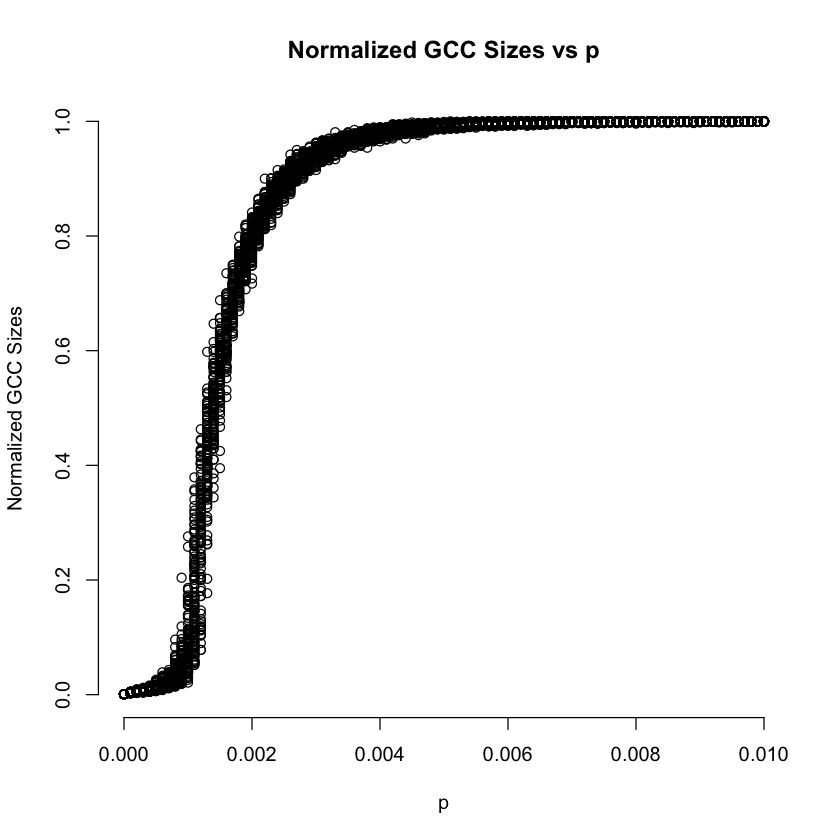

In [4]:
n <- 1000
prob <- seq(0, 0.01, 0.0001)
# plot frame
plot.new()
plot.window(xlim = c(0,0.01), ylim = c(0, 1))
axis(1)
axis(2)
title(main = "Normalized GCC Sizes vs p")
title(xlab = "p")
title(ylab = "Normalized GCC Sizes")

# scatter points
for (i in seq(1:length(prob))) {
     for (j in seq(1:100)) {
        g <- random.graph.game(n, prob[i], directed = FALSE)
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        NGccSize <- g.components$csize[giant.idx] / n
        points(prob[i], NGccSize)  
     }
}

(d) 
    
    i. Define the average degree of nodes c = np = 0.5. Sweep over number of nodes,n, ranging from 100 to 10000. Plot the expected size of the GCC of ER networks with n nodes and edge-formation probabilities p = c/n, as a function of n. What trend is observed?

When c is  0.5 , GCC average size is:  15.60484 


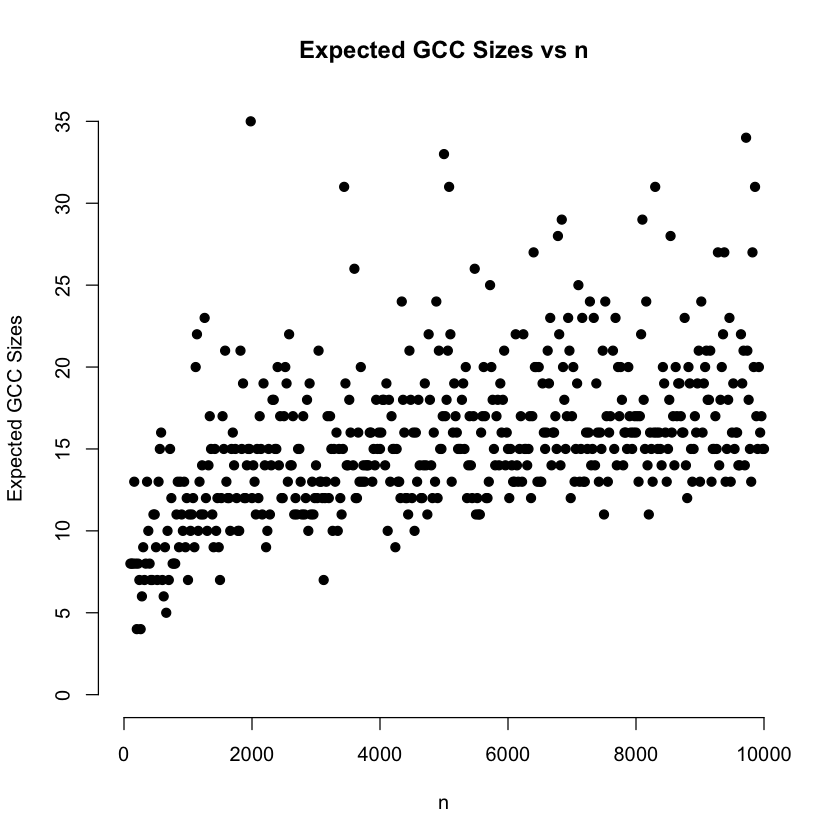

In [6]:
c <- 0.5
n <- seq(100, 10000, 20)
# plot frame
plot.new()
plot.window(xlim = c(0, 10000), ylim = c(0, 35))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "n")
title(ylab = "Expected GCC Sizes")

gcc.expected <- 0
for(i in 1:length(n)){
    g <- erdos.renyi.game(n[i], c / n[i], directed=F)
    g.components <- clusters(g)
    giant.idx <- which.max(g.components$csize)
    gcc.size = g.components$csize[giant.idx]
    points(n[i], gcc.size, pch = 19)
    gcc.expected = gcc.expected + gcc.size
}
cat("When c is ", c, ", GCC average size is: ", gcc.expected / length(n), "\n")

    ii. Repeat the same for c = 1.

When c is  1 , GCC average size is:  269.2097 


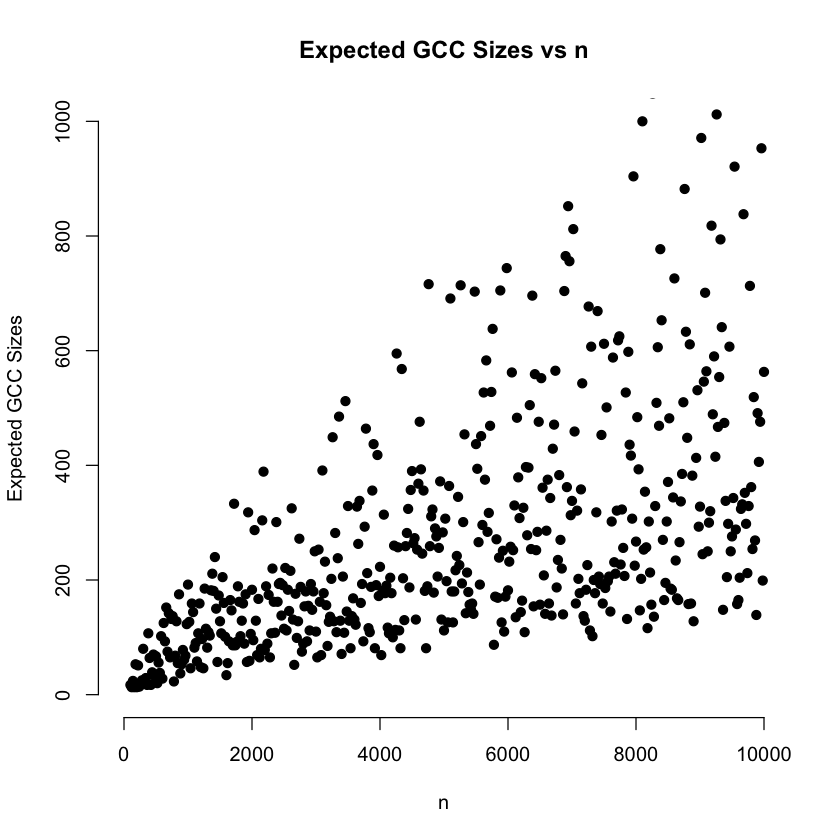

In [8]:
c <- 1
n <- seq(100, 10000, 20)
# plot frame
plot.new()
plot.window(xlim = c(0, 10000), ylim = c(0, 1000))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "n")
title(ylab = "Expected GCC Sizes")

gcc.expected <- 0
for(i in 1:length(n)){
    g <- erdos.renyi.game(n[i], c / n[i], directed=F)
    g.components <- clusters(g)
    giant.idx <- which.max(g.components$csize)
    gcc.size = g.components$csize[giant.idx]
    points(n[i], gcc.size, pch = 19)
    gcc.expected = gcc.expected + gcc.size
}
cat("When c is ", c, ", GCC average size is: ", gcc.expected / length(n), "\n")

    iii. Repeat the same for values of c = 1.1, 1.2, 1.3, and show the results for these three values in a single plot.

When c is  1.1 , GCC average size is:  819.7419 
When c is  1.2 , GCC average size is:  1559.081 
When c is  1.3 , GCC average size is:  2123.996 


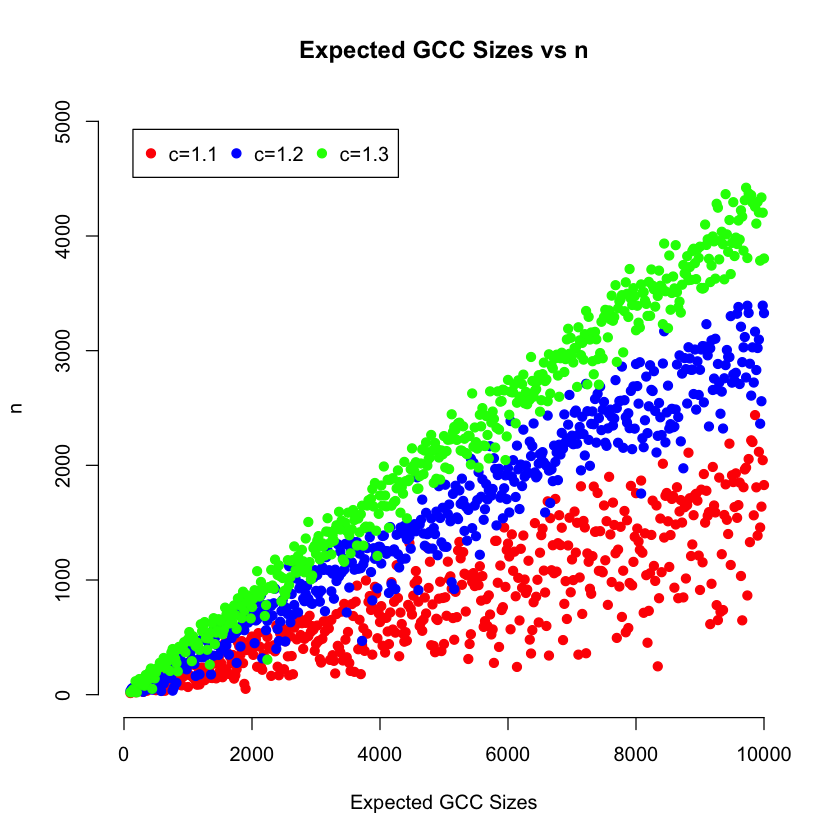

In [9]:
n = seq(100, 10000, 20)
# plot frame
plot.new()
plot.window(xlim = c(0,10000), ylim = c(0, 5000))
axis(1)
axis(2)
title(main = "Expected GCC Sizes vs n")
title(xlab = "Expected GCC Sizes")
title(ylab = "n")

gcc.expected = 0
c = c(1.1, 1.2, 1.3)
color = c("red", "blue", "green")

for (k in seq(1,3)) {
    for (i in seq(1, length(n))) {
        g <- erdos.renyi.game(n[i], c[k] / n[i], directed = FALSE)
        g.components <- clusters(g)
        giant.idx <- which.max(g.components$csize)
        gcc.size = g.components$csize[giant.idx]
        gcc.expected = gcc.expected + gcc.size
        points(n[i], gcc.size, col = color[k], pch = 19)
    }
    gcc.expected = gcc.expected / length(n)
    cat("When c is ", c[k], ", GCC average size is: ", gcc.expected, "\n")
    gcc.expected = 0
}
legend("topleft", inset=.05, legend=c("c=1.1", "c=1.2", "c=1.3"), col=c("red", "blue", "green"), pch=19, horiz=TRUE)

## 2. Create networks using preferential attachment model

(a) Create an undirected network with n = 1000 nodes, with preferential attachment model, where each new node attaches to m = 1 old nodes. Is such a network always connected?

In [185]:
g <- barabasi.game(1000, m = 1, directed = FALSE)
cat("Preferential attachment model network is always connected: ", is.connected(g), "\n")

Preferential attachment model network is always connected:  TRUE 


(b) Use fast greedy method to find the community structure. Measure modularity.

The community size is  46 60 46 43 43 40 44 39 41 36 34 32 29 31 28 34 27 27 26 27 23 22 21 20 19 18 20 20 21 16 18 16 14 10 9 


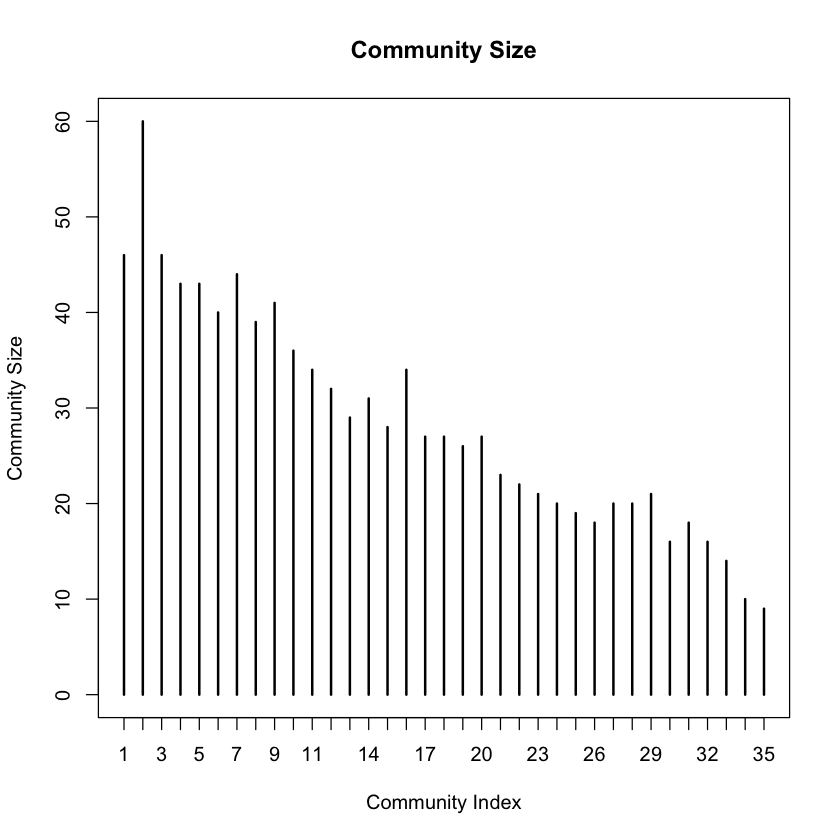

In [188]:
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")

(c) Try to generate a larger network with 10000 nodes using the same model. Compute modularity. How is it compared to the smaller network’s modularity?

The community size is  223 136 226 163 135 145 146 136 135 191 127 126 126 123 132 127 185 122 146 124 134 118 148 116 132 113 111 144 114 127 111 108 108 108 108 111 102 103 104 99 120 97 98 116 89 90 92 88 112 87 105 84 94 104 85 83 97 88 92 85 77 80 80 73 83 74 75 87 74 70 70 68 68 63 65 62 65 62 57 58 60 55 56 60 57 58 53 56 56 50 50 49 47 53 45 46 50 43 42 43 42 58 39 38 37 39 37 43 28 


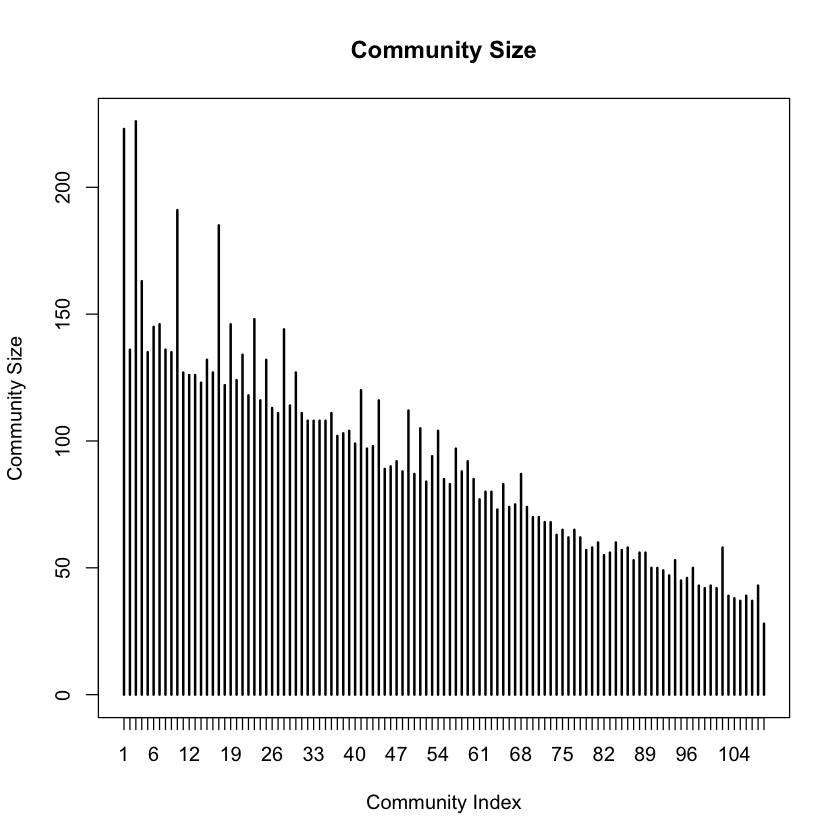

In [189]:
g <- barabasi.game(10000, m = 1, directed = FALSE)
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")

(d) Plot the degree distribution in a log-log scale for both n = 1000, 10000, then estimate the slope of the plot.

When n is 1000 , the slop is -2.52521

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“20 y values <= 0 omitted from logarithmic plot”

When n is 10000 , the slop is -2.724835

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“69 y values <= 0 omitted from logarithmic plot”

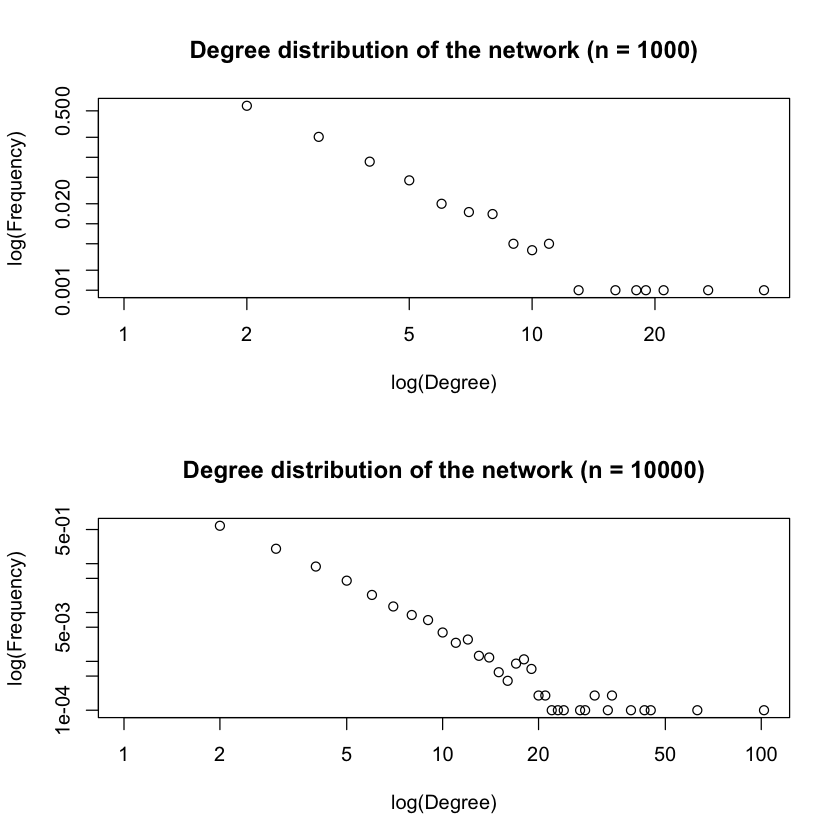

In [76]:
n <- c(1000, 10000)
par(mfrow=c(2,1))
for (i in 1:length(n)) {
    g <- barabasi.game(n[i], m = 1, directed = FALSE)
    title <- sprintf("Degree distribution of the network (n = %d)", n[i])
    
    # linear regression -> slop
    degree.freq <- degree.distribution(g)
    degree = 1:length(degree.freq)
    df.log = log(degree.freq[degree.freq != 0])
    d.log = log(degree[degree.freq != 0])
    cat("When n is", n[i], ", the slop is", lm(df.log ~ d.log)$coefficients[2])
    
    # Plot
    plot(degree, degree.freq, main = title, xlab = "log(Degree)", ylab = "log(Frequency)", log = "xy")
}

(e) You can randomly pick a node i, and then randomly pick a neighbor j of that node. Plot the degree distribution of nodes j that are picked with this process, in the log-log scale. How does this differ from the node degree distribution?

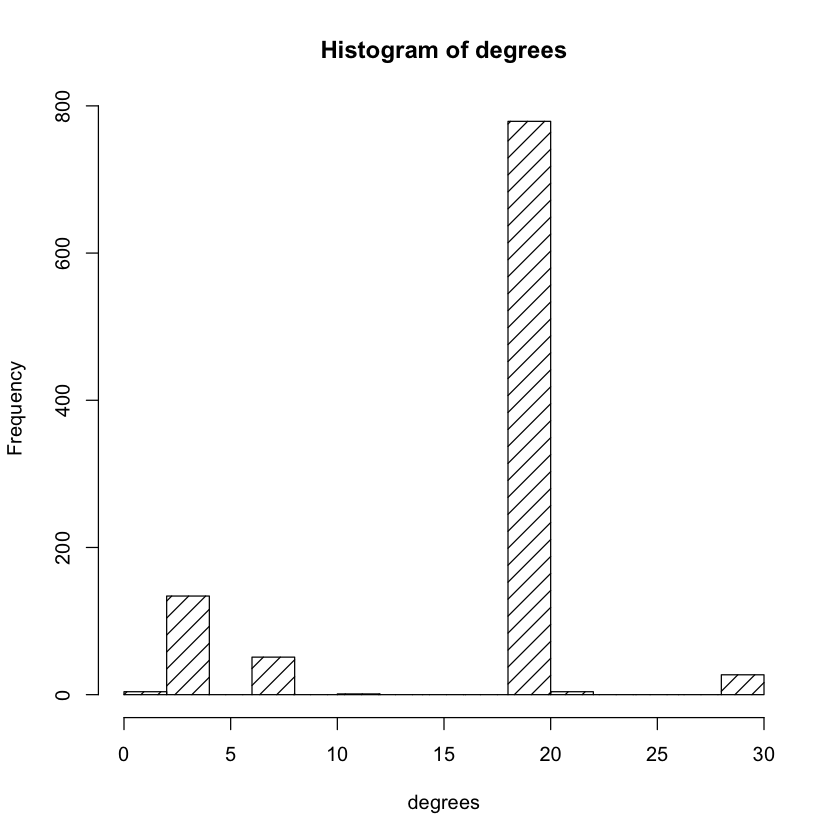

In [113]:
n <- 1000
g <- barabasi.game(n, m = 1, directed = FALSE)
degrees <- array(0, n)
for (i in 1:n) {
    node.rand <- sample(1:n, 1)
    node.neighbors <- neighbors(g, v = node.rand)
    if (length(node.neighbors) > 0) {
        neighbor.rand <- sample(1:length(node.neighbors), 1)
        degrees[i] <- degree(g, neighbor.rand)        
    }
}
hist(degrees, freq = TRUE, density = 10)

(f) Estimate the expected degree of a node that is added at time step i for 1 ≤ i ≤ 1000. Show the relationship between the age of nodes and their expected degree through an appropriate plot.

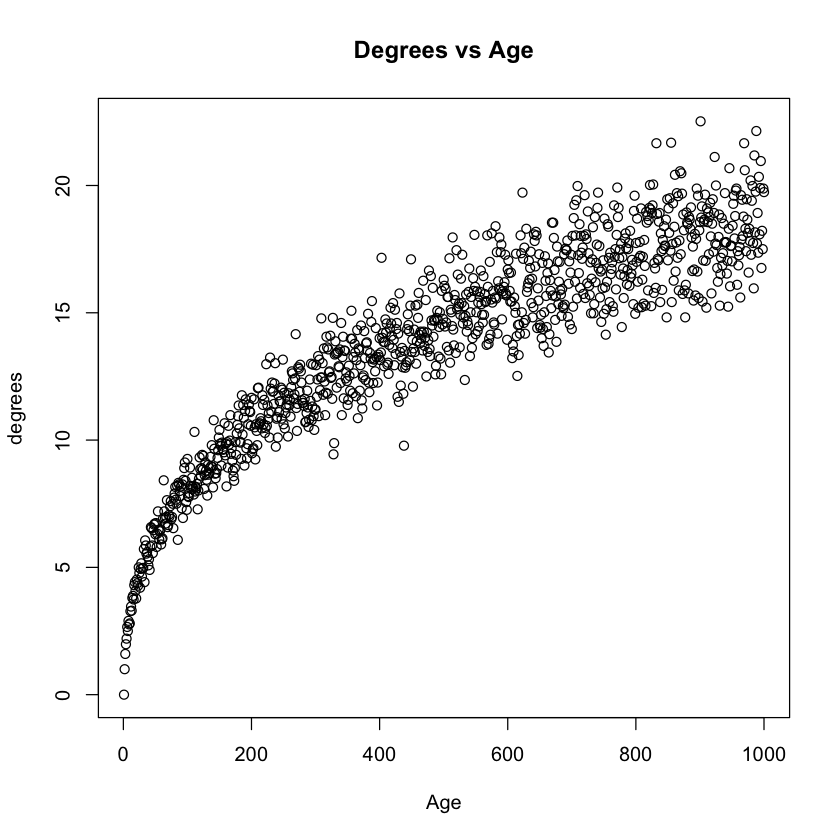

In [128]:
steps <- 1000
degrees <- array(0, steps)
g.repeat <- 50

for (i in 1:steps) {
    degree.mean = 0
    for (j in 1:g.repeat) {
        g <- barabasi.game(i, m = 1, directed = FALSE)
        degree.mean <- degree.mean + degree(g, 1)  
    }
    degree.mean <- degree.mean / g.repeat
    degrees[i] <- degree.mean 
}
plot(degrees, xlab = "Age", ylab = "degrees", main = "Degrees vs Age")

(g) Repeat the previous parts for m = 2, and m = 5. Why was modularity for m = 1 high?

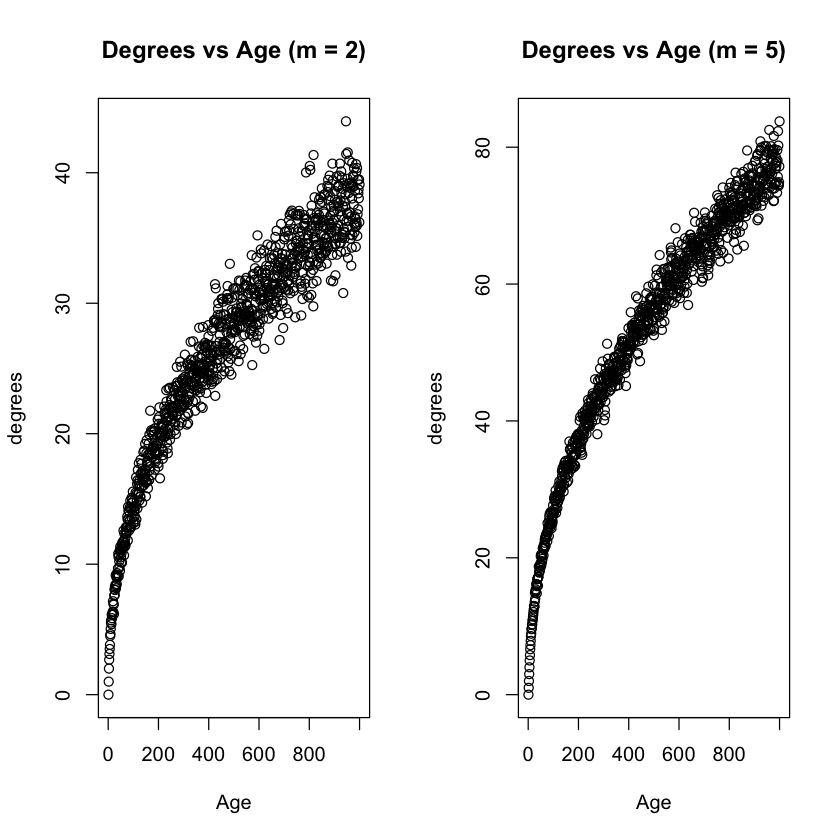

In [127]:
steps <- 1000
degrees <- array(0, steps)
g.repeat <- 50
par(mfrow = c(1, 2))
m = c(2, 5)
for (i in 1:2) {
    for (j in 1:steps) {
        degree.mean = 0
        for (k in 1:g.repeat) {
            g <- barabasi.game(j, m = m[i] , directed = FALSE)
            degree.mean <- degree.mean + degree(g, 1)    
        }
        degree.mean <- degree.mean / g.repeat
        degrees[j] <- degree.mean
    }    
    title = sprintf("Degrees vs Age (m = %d)", m[i])
    plot(degrees, xlab = "Age", ylab = "degrees", main = title)
}



(h) Again, generate a preferential attachment network with n = 1000, m = 1. Take its degree sequence and create a new network with the same degree sequence, through stub-matching procedure. Plot both networks, mark communities on their plots, and measure their modularity. Compare the two procedures for creating random power-law networks.

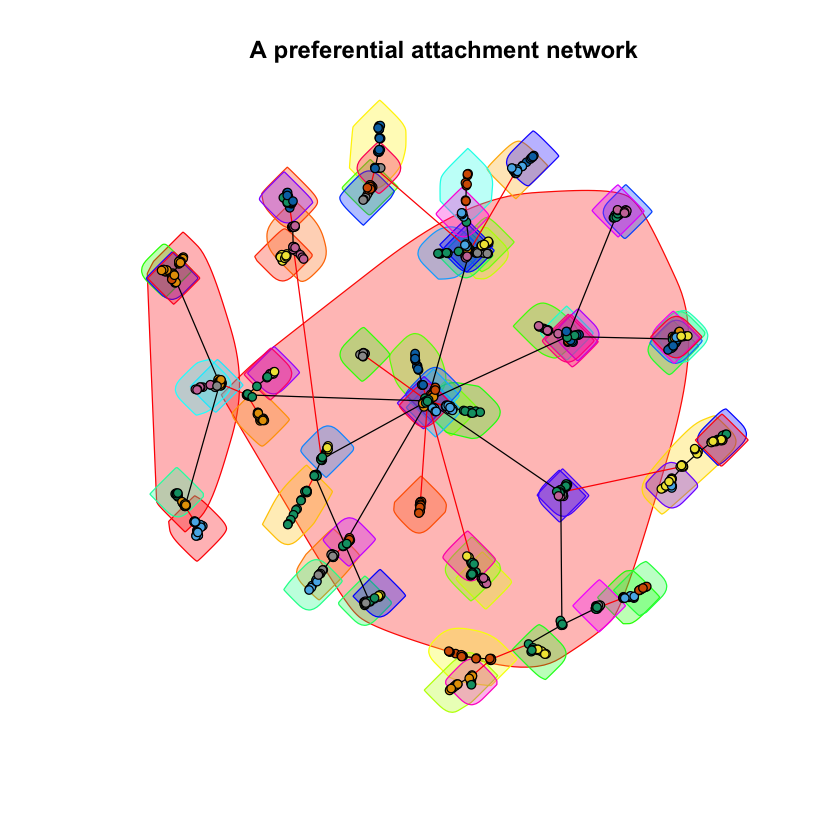

The community size of the network is  62 49 48 50 40 45 48 39 38 48 36 43 34 32 31 32 26 25 24 24 27 22 22 19 18 19 16 15 16 13 17 12 10 
The community size of the new network is  43 37 36 37 28 30 48 30 42 25 29 47 24 27 62 22 19 43 27 20 28 12 8 8 5 5 4 4 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 


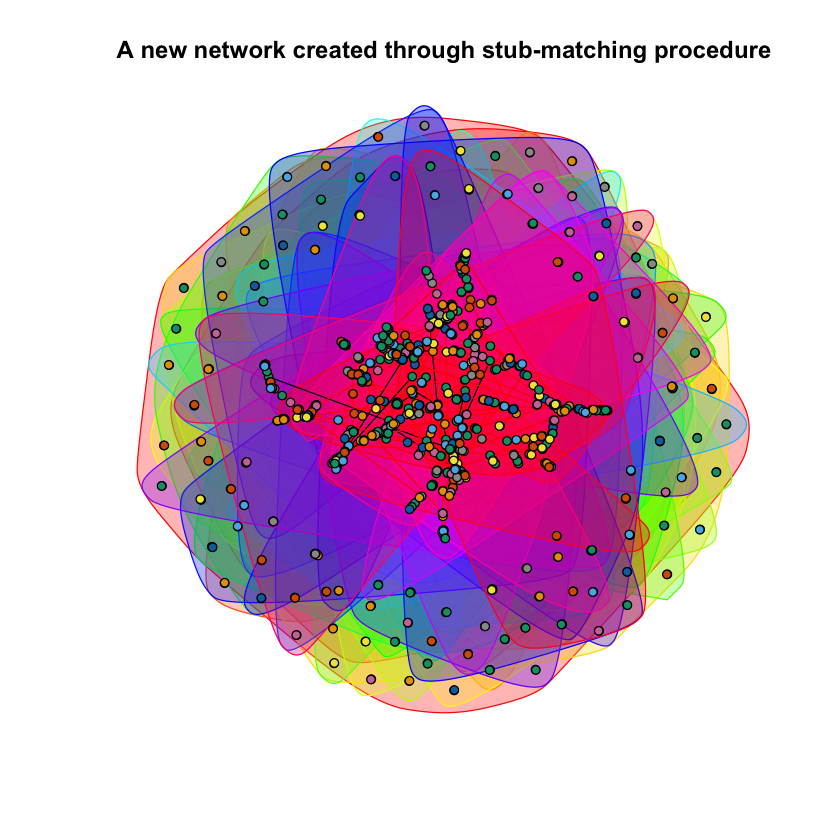

In [149]:
n <- 1000
g <- barabasi.game(n, m = 1, directed = FALSE)
degrees <- degree(g)
g.new <- sample_degseq(degrees, method = "simple.no.multiple")
community <- walktrap.community(g)
# community.new <- walktrap.community(g.new)
# par(mfrow = c(2,1))
plot(community, g, vertex.label = NA, vertex.size = 3, main = "A preferential attachment network")
plot(community, g.new, vertex.label = NA, vertex.size = 3, main = "A new network created through stub-matching procedure")

g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
cat("The community size of the network is ", community.size, "\n")

g.fgc.new <- fastgreedy.community(g.new)
community.size.new <- sizes(g.fgc.new)
cat("The community size of the new network is ", community.size.new, "\n")

## 3. Create a modified preferential attachment model that penalizes the age of a node

(a) Each time a new vertex is added, it creates $m$ links to old vertices and the probability that an old vertex is cited depends on its degree (preferential attachment) and age. In particular, the probability that a newly added vertex connects to an old vertex is proportional to:$$P[i]\sim(ck_i^\alpha+a)(dl_i^\beta+b)$$ where $k_i$ is the degree of vertex $i$ in the current time step, and $l_i$ is the age of vertex $i$. Produce such an undirected network with 1000 nodes and parameters $m = 1$, $\alpha = 1$, $\beta =  1$, and $a = c = d = 1,b = 0$. Plot the degree distribution. What is the power law exponent?

##### aging.barabasi.game(...) parameters
>c - deg.coef (c, optional, the default is 1)

>alpha - pa.exp (alpha, mandatory argument)

>a - zero.deg.appeal (a, optional, the default value is 1)

>d - age.coef (d, optional, the default is 1)

>beta - aging.exp (beta, mandatory argument)

>b - zero.age.appeal (b, optional, the default is 0)

Warning message in aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, :
“aging exponent is positive”

The power law exponent is 1.466626 


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“163 y values <= 0 omitted from logarithmic plot”

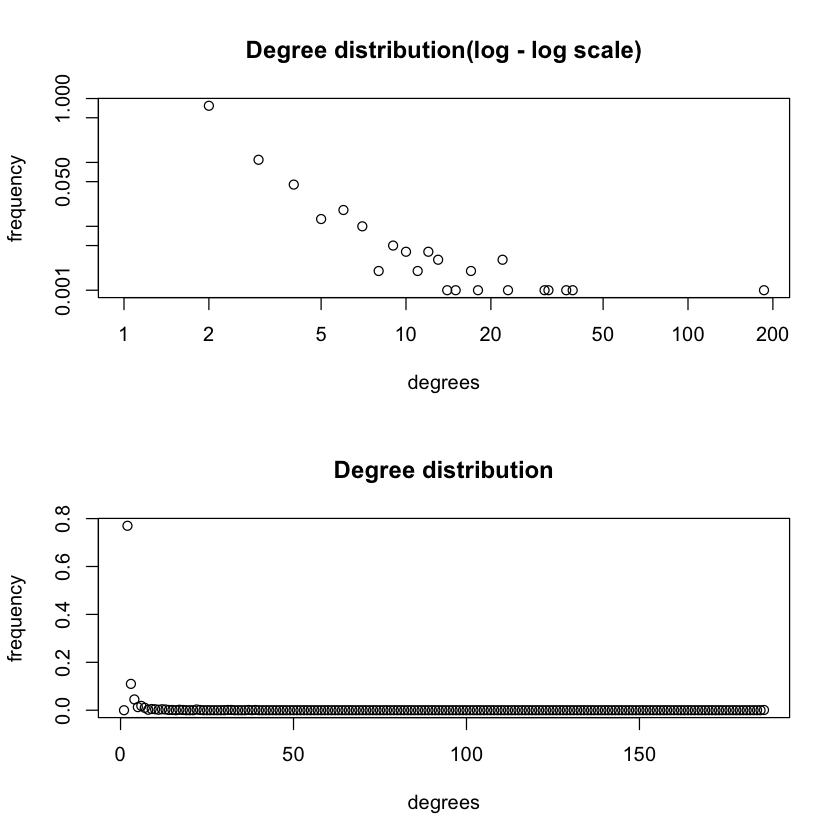

In [227]:
n <- 1000
g <- aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
# g <- aging.prefatt.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
degrees.freq <- degree.distribution(g)

degrees <- 1:length(degrees.freq)
degrees.freq.log <- log(degrees.freq[degrees.freq != 0])
degrees.log <- log(degrees[degrees.freq != 0]) 
cat("The power law exponent is", -lm(degrees.freq.log ~ degrees.log)$coefficients[2], "\n")

par(mfrow = c(2, 1))
plot(degrees.freq, log = "xy", xlab = "degrees", ylab = "frequency", main = "Degree distribution(log - log scale)")
plot(degrees.freq, xlab = "degrees", ylab = "frequency", main = "Degree distribution")

(b) Use fast greedy method to find the community structure. What is the modularity?

Warning message in aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, :
“aging exponent is positive”

The community size is  133 71 58 41 45 67 45 58 43 36 27 34 21 26 26 23 13 18 13 11 15 9 10 10 9 9 10 9 9 9 8 8 8 8 8 16 7 4 4 4 5 4 4 4 


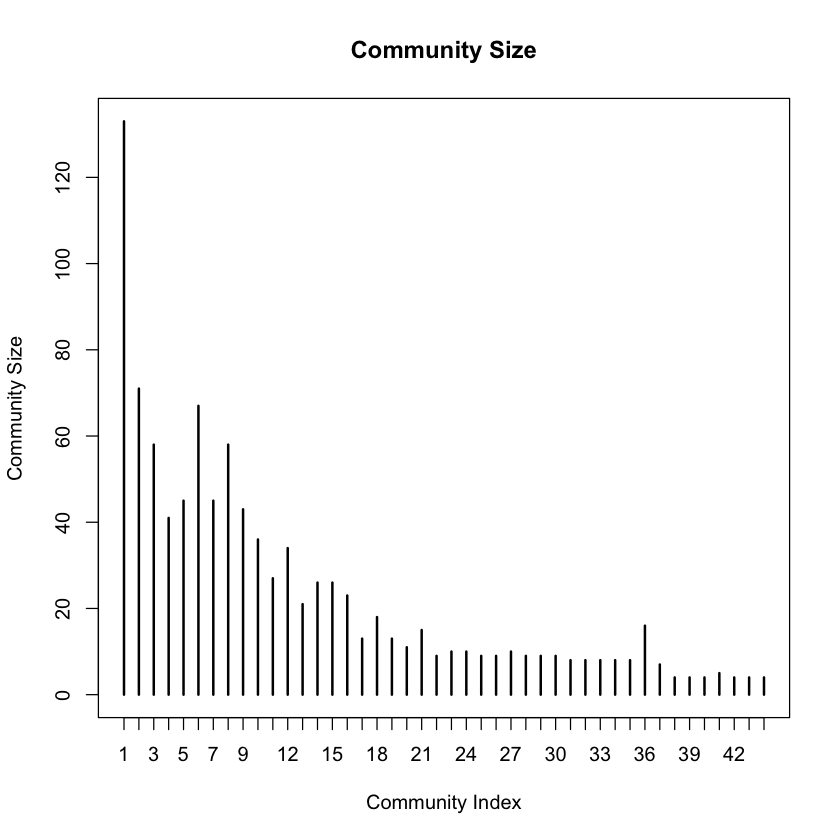

In [192]:
n <- 1000
g <- aging.barabasi.game(n, m = 1, deg.coef = 1, pa.exp = 1, zero.deg.appeal = 1, age.coef = 1, aging.exp = 1, zero.age.appeal = 0, directed = FALSE)
g.fgc <- fastgreedy.community(g)
community.size <- sizes(g.fgc)
plot(community.size, xlab = "Community Index", ylab = "Community Size", main = "Community Size")
cat("The community size is ", community.size, "\n")